# CLARITY DRYP WINTER SCHOOL, UK: FEB 10 TO MAR 21 2025

## Hydrological modelling using DRYP

This comprehensive school affords us the opportunity to build the DRYP models of the CLARITY TLabs.

* 1. Installation of the DRYP model
* 2. Preparing model inputs parameters and dataset
* 3. Preparing and running DRYP simulations
* 4. ***Post processing simulation outputs***


### 4. Post-processing simulation outputs

This section will cover the following units:

* A. Understanding the outputs
* B. Post-processing of the outputs
* C. Sampling of the outputs
* D. Other actions possible.

#### A. Understanding model outputs

Model results are stored in two different formats:

* I. Comma delimited files (*.csv*) to store time series, and
* II. netCDF files (*.nc*) to store gridded output datasets

In addition, 
* ascii raster files (*.asc*) are created to store the initial condions of hydrological states (Q0, soil moisture, and WTE).

I. Model outputs stored in *csv* files store (i) domain average model results, and (i) model results at locations specified by the modeller in the model input files.

**NOTE**: Domain average results have the letters "avg" added at the end of the file name. Point location result files have a letter "p" followed by the name of the stored variable (e.g. 'tht' for soil moisture) added at the end of the name of the file.

We can manually explore the *csv* files.

However, for convenience, we can do as follows.

In [11]:
# First, please specify the path of the simulation outputs.

######
general_path = "C:/Users/oshin/OneDrive - Cardiff University/CLARITY/Work_India/model/"  # CHANGE THIS TO YOUR MODEL PATH

out_path = general_path + "outputs/"
######

Let's begin with the domain average outputs.

In [12]:
#### Indicate the file of the simulation output to be explored.

fsim = [
out_path + "raichur_chirps_distr_01/Raichur_TLab_baseline_sim_avg.csv",
]


In [6]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**GOAL**: To use *pandas* to open and explore the dataset specified above.

In [9]:
def aggregate_slice_csv(fname, agg_step='M', mean=True,
                        date_start='1981-01-01', date_end='2023-12-01',
                        timefield='Date'):
	df = pd.read_csv(fname)
	df[timefield] = pd.to_datetime(df[timefield])
	df = df[df[timefield].between(date_start, date_end)]
	df.index = pd.DatetimeIndex(df[timefield])
	if mean is True:
		df = df.resample(agg_step).mean()#.reset_index()
	else:
		df = df.resample(agg_step).sum()#.reset_index()
	return df

C:\Users\oshin\AppData\Local\Temp\ipykernel_19908\846331860.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(agg_step).mean()#.reset_index()
C:\Users\oshin\AppData\Local\Temp\ipykernel_19908\846331860.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(agg_step).mean()#.reset_index()
C:\Users\oshin\AppData\Local\Temp\ipykernel_19908\846331860.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(agg_step).mean()#.reset_index()


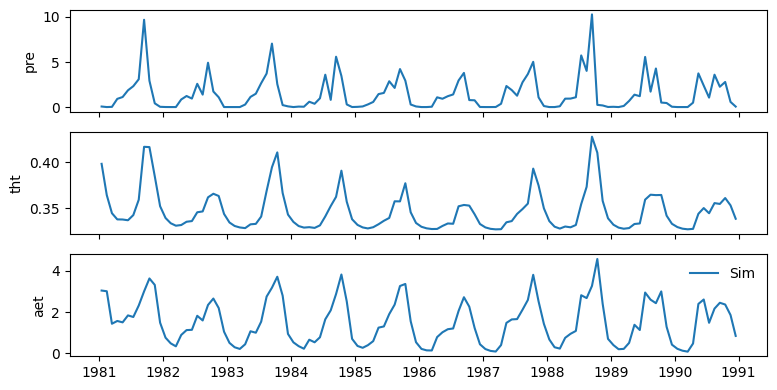

In [10]:
# plot data
fig, ax = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(9, 4.5)
label = ['pre', 'tht', "aet"]#, "twsc"]
field = ['pre_0','tht_0', "aet_0"]#, "twsc_0"]
#ilabel = "sim"
for ifname in fsim:
    for ifield, ilabel, iax in zip(field, label, fig.axes):
        data = aggregate_slice_csv(ifname, timefield='Date')
        #ax.plot(data['date'], data['flow(m3/s)'], label=ilabel)#data.plot(y='Flow (Cumecs)')        
        if ifield == "twsc_0":
            iax.plot(data['Date'], np.cumsum(data[ifield]))#, label=ilabel)
        elif ifield == "tht_0":
            iax.plot(data['Date'], data[ifield])#, scale=True)
        else:
            iax.plot(data['Date'], data[ifield])#, label=ilabel)
        
        iax.set_ylabel(ilabel)
iax.legend(["Sim"], frameon=False)

**TASK**: (1) Try to explore other variables in the doamin average output file specified above. (2) Explore the domain average variables for the riparian zone. 

Next, let's explored the following 8 variables which are stored at the locations we specified.

* i. Actual evapotranspiration (aet)
* ii. Streamflow (dis)
* iii. Groundwater discharge (gdh)
* iv. Infiltration (inf)
* v. Total groundwater recharge (rch)
* vi. Surface water storage (including rivers) (ssz)
* vii. soil water content (tht)
* viii. Water table elevation (wte)

In [13]:
#### For example, let's indicate the streamflow file to explore it.

fnamesim = [
out_path + "raichur_chirps_distr_01/Raichur_TLab_baseline_sim_p_dis.csv",
]


C:\Users\oshin\AppData\Local\Temp\ipykernel_19908\846331860.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(agg_step).mean()#.reset_index()


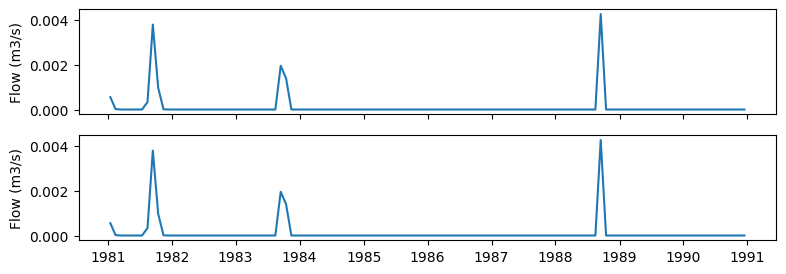

In [17]:
fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(9, 3)

for ifnamesim in fnamesim:
    data = aggregate_slice_csv(ifnamesim)
    stn = ['dis_0', "dis_0"]
    for istn, iax in zip(stn, fig.axes):
        iax.plot(data['Date'], data[istn]/30.5/86400, label='Sim')
        iax.set_ylabel("Flow (m3/s)")

In [18]:
# uncomment the lines below and modify to save your plot accordingly

#fname_out = general_path + "figures/"
#fig.savefig(fname_out+"xxxxxxx.png", dpi=300)

**TASK**: plot for *wte* and other variables at the specified locations.

II. Gridded outputs are stored by DRYP in netCDF (*.nc*) and raster (*.asc*) files. The netCDF files store temporal grided datasets whereas raster files show 'Q0', 'tht', 'tht_rp', and 'wte' variables at the last step of the simulation.

The following variables are stored as netCDF files:

* Precipitaion (pre)
* Potential evapotranspiration (pet)
* Actual evapotranspiration (aet)
* soil water content (tht)
* Total groundwater recharge (rch)
* Focused groundwater recharge (fch)
* Water table elevation (wte)
* Groundwater discharge (gdh)
* Groundwater Evapotranspiration (egw)
* Streamflow (dis)
* Infiltration (inf)
* Runoff (run)
* Total water storage (twsc)
* soil water content riparian zone (tht)


NetCDF files are easily handled with 'xarray', although 'netCDF4' or 'geopands' (all being python modules) can also be used.

In [19]:
import xarray as xr

In [32]:
#####
"""
## for testing...
fname_0 = "C:/Users/oshin/OneDrive - Cardiff University/CLARITY/Work_Dodoma/model/outputs/dodoma_output_imerg_d_distr_v20"
filex = "/Dodoma_TLab_baseline_sim_grid.nc"
#fname_0
fname_nc = fname_0 + filex
#fname_nc
"""
#"""
#fname_nc = out_path + "outputs/XXXXXX_sim_grid.nc"
#"""

'\n## for testing...\nfname_0 = "C:/Users/oshin/OneDrive - Cardiff University/CLARITY/Work_Dodoma/model/outputs/dodoma_output_imerg_d_distr_v20"\nfilex = "/Dodoma_TLab_baseline_sim_grid.nc"\n#fname_0\nfname_nc = fname_0 + filex\n#fname_nc\n'

In [33]:
#xr.open_dataset(fname_nc)

In [34]:
def read_dataset(fname, var_name='tht'):
	# Open the first netCDF file
	data = xr.open_dataset(fname)
	data = data[var_name]
	return data

def slice_dataset_time(dataset, start_time="2003-01-01", end_time="2012-01-01"):
	# Slice the dataset between two dates
	dataset = dataset.sel(time=slice(start_time, end_time))
	return dataset

In [35]:
#read_dataset(fname_nc, var_name='tht')

**TASK**: make different spatial plots of the variables stored in the *.nc* files.

As mentioned earlier, DRYP stores, as raster files, at the end of the simulation, the following variables:

* water table elevation
* soil and riparian water content
* surface water storage


Raster files can easily be handled with rasterio.

In [36]:
import rasterio

In [37]:
def plot_raster_file(fname, ax=None, vmin=-20.0, vmax=20.0):
    # create plot
    if ax is None:
        fig, ax = plt.subplots()
    cmap = plt.cm.get_cmap('coolwarm_r', 12)
    data = rasterio.open(fname).read(1)
    im = ax.imshow(data,# origin="lower",#cmap=cmap, 
                   #vmin=vmin, vmax=vmax,
                   )#extent=bounds)	
    
    ax.axis('off')
    plt.colorbar(im)
    return im

In [42]:
######
fname_raster = out_path + "raichur_chirps_distr_01/Raichur_TLab_baseline_sim_avg_Q_ini.asc"
#fname_raster

C:\Users\oshin\AppData\Local\Temp\ipykernel_19908\3815166241.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm_r', 12)


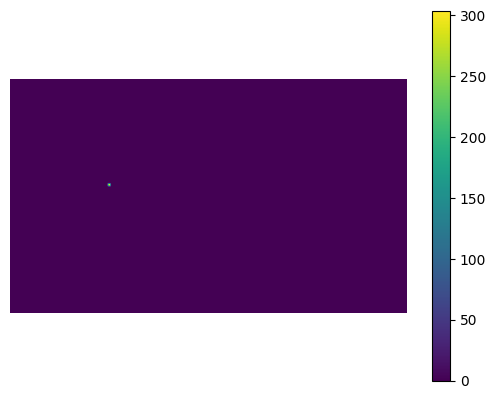

In [41]:
plot_raster_file(fname_raster, ax=None, vmin=-20.0, vmax=20.0)

In [46]:
######
#fname_raster2 = out_path + "raichur_chirps_distr_01/Raichur_TLab_baseline_sim_avg_wte_ini.asc"

#plot_raster_file(fname_raster, ax=None, vmin=-20.0, vmax=20.0)

#### B. Post-processing of the outputs

A post-processing component (DRYP_pptools) has been added to DRYP to perform basic operation with model outputs. This tool is still under
development therefore capabilities are limited.

Bellow some of the operations that can be performed with DRYP_pptools are listed, some examples are also shown below: 

* I. calulate long term average
* II. calculate WRSI
* III. calculate anomalies
* IV. calculate total water storage anomalies (TWSA)
* V. calculate seasonal average
* VI. calculate seasonal anomalies
* VII. other calculations

Start by initiallising the DRYP post processing tool library.

In [48]:
# Import general libraries
import matplotlib.pyplot as plt

# Import libraries from local repository
#import sys
#sys.path.append('C:/Users/Edisson/Documents/GitHub/DRYPv2.0.1')  ### Not needed since we are in the environment!

import cuwalid.tools.DRYP_pptools as pptools

Initialize the grid postprocessing tool...
This step will create a python object with all model output filenames. 
The function uses the model parameter input file to get model output and paths:

In [49]:
######
general_path = "C:/Users/oshin/OneDrive - Cardiff University/CLARITY/Work_India/model/"  # CHANGE THIS TO YOUR MODEL PATH

input_file = general_path + "input_files/"

######

file_model_input = input_file + "raichur_tlab_model_input_dstr_10.json"

In [50]:
#gridpp = pptools.grid_pptools(file_model_input)

When runing the function below, the long term average, WRSI, and TWSA will be estimated. These functions will directly use model paths and output files specified in the input model file.

In [51]:
#gridpp.get_mean() # save mean values
#gridpp.get_wrsi() # save wsri
#gridpp.get_twsa() # save total water storage anomaly

We can also use DRYP_pptools without initalising the gridded component. We can directly call all the functions used by the post processing tools. This function is useful when model outputs are located in other folders.

A detailed description of each function can be found in DRYP documentation, which is located in DRYP/doc/build/html (you can use your browser to open html files). 

I. Calculate the long term average of model fluxes

In [52]:
# For example,
#####
#"""
## for testing...
fname_0 = "C:/Users/oshin/OneDrive - Cardiff University/CLARITY/Work_Dodoma/model/outputs/dodoma_output_imerg_d_distr_v20"
filex = "/Dodoma_TLab_baseline_sim_grid.nc"
#fname_0
fname_nc = fname_0 + filex
#fname_nc
#"""
#"""
#fname_nc = out_path + "outputs/XXXXXX_sim_grid.nc"
#"""

In [85]:
fields = ['pre', 'inf', 'pet', 'rch', 'aet', 'gdh', 'egw', 'fch', 'twsc', 'run']

In [83]:
pptools.calculate_mean_from_netCDF(fname_nc, field=fields, fname_out=None, deltat='YE', start_time='1981-01-1', end_time='2023-12-01')

**TASK** Plot long term average values of focused recharge

II. Calculate the Water Requirement Satisfaction Index (WRSI)

In [84]:
pptools.calculate_WRSI_from_netCDF(fname_nc)

C:\Users\oshin\dryp_new\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\oshin\dryp_new\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


III. Calculate Total Water Storage Anomalies (TWSA)

In [101]:
pptools.calculate_twsa_from_netCDF(fname_nc)


C:\Users\oshin\dryp_new\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


IV. Calculate Aridity Index (AI)

In [105]:
#pptools.calculate_AI_from_netCDF(fname_pre, fname_pet)  # Ask Andres about this.

In [106]:
#from netCDF4 import Dataset as NetCDFFile 
#nc = NetCDFFile(fname_nc)

#fname_pre = nc.variables['pre'][:]
#fname_pet = nc.variables['pet'][:]
################
#fname_pre = read_dataset(fname_nc, var_name='pre')
#fname_pet = read_dataset(fname_nc, var_name='pet')

#pptools.calculate_AI_from_netCDF(fname_pre, fname_pet)

V. Calculate the anomalies

In [107]:
pptools.calculate_anomalies_from_netCDF(fname_nc)

C:\Users\oshin\dryp_new\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


VI. Calculate seasonal averages

In [109]:
pptools.calculate_seasonal_average_from_netCDF(fname_nc, season="OND")  #test for "JFM"

C:\Users\oshin\dryp_new\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\oshin\dryp_new\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


VII. Other calculations: explore the DRYP post-processing tools for more.

#### C. Sampling model outputs

Analysing model outputs often requires extracting specific values from gridded datasets that were not stored as *.csv* files.
Python has different libraries to process netCDF files that can be used to extract values from gridded datasets. Here, we have combined some of the Python libraries to facilitate the postprocessing of DRYP model outputs. These functions have beed added into the DRYP pptool.

* Extranting values from point locations

In [110]:
#fname_points = general_path + "parameters/XXXXXX_stations.csv"
#fname_netcdf = out_path + "outputs/XXXXXXX_grid.nc"

In [111]:
#df = pptools.get_dataframe_point_from_netcdf(fname_netcdf, fname_points, field='dis')

**TASK**: Explore and plot the created dataframe

* Extracting values from specified regions

For this task, a region has to be provided, it can be as raster file or a shapefile.

As an example a shapefile will be used to extract infomation from a netCDF file.

In [112]:
#fname_shp = region_path + "XXXX.shp"   # of a defined zone.
#fname_raster = general_path + "parameters/XXXX.asc"
#fname_netcdf = out_path + "outputs/XXXXXX_grid.nc"

In [113]:
#fname_output = general_path + "parameters/postpp_XXXX_tlab_zone_SN_mask.asc"

In [114]:
#This function will create a raster file and name as given above. 
#rrtools.create_raster_from_shapefile(fname_shp, fname_raster, fname_output)

In [117]:
#This function will produce a pandas dataframe of indicated variables for the defined zone.
#df = pptools.get_dataframe_zone_from_netcdf(fname_netcdf, fname_output, field=['aet', 'twsc'])

**TASK**: Explore and plot the created dataframe

#### D. Other Actions...
#### Visualising spatial variables

Plot model results (this can be done with any library available in python for processing netcdf files or even in other application)

In [118]:
import shapefile as shp

In [119]:
def read_dataset(fname, var_name='tht'):
	# Open and select a variable of the netCDF file
	data = xr.open_dataset(fname)
	data = data[var_name]
	return data

def get_mask(fmask):
	# get a mask
	mask = np.flip(rasterio.open(fmask).read(1), 0)
	# mask values for visualisation
	mask = np.array(mask, dtype=float)
	mask[mask <= 0] = np.nan
	return mask # output an array

def resample_dataset(data, mean=True, delt='Y'):
	# calculate climatological mean
	if mean is True:
		data = data.resample(time='Y').mean()
	else:
		data = data.resample(time='Y').sum()	
	return data # output an array

def get_bounds(fmask):
	# get map extend
	src = rasterio.open(fmask)
	extend = []
	for index in [0, 2, 1, 3]:
		extend.append(src.bounds[index])
	return extend
	
def plot_map_raster(bounds, data, ax, vmin=-20.0, vmax=20.0):
	# create plot	
	cmap = plt.cm.get_cmap('coolwarm_r', 12)
	im = ax.imshow(data, cmap=cmap, origin="lower",
				vmin=vmin, vmax=vmax,
				extent=bounds)	
	ax.axis('off')
	return im
	
def plot_map_raster_by_field(bounds, data, field, ax=None):
	# create figure
	if ax is None:
		fig, ax = plt.subplots()
    # create var    
	columns = ['pre', 'pet', 'aet', 'tht', 'inf', 'rch', 'run',
				'tls', 'fch', 'dch', 'gdh', 'wte', 'egw', 'dis']
	vmin = [0, 600, 0, 0.1, 0, 0, 0,
				0, 0, 0, 0, 0, 0, 0]
	vmax = [1200, 24e2, 2e3, 0.6, 1200, 500, 1000,
				500, 500, 500, 100, 80.0, 200, 1000]
	units = [1, 1, 1, 1, 1, 1.0, 1e-6,
				1, 1, 1, 1e3, 1, 1, 1e-6]
	cmap = ['Blues', 'viridis_r', 'coolwarm_r', 'Blues', 'coolwarm_r', 'coolwarm_r', 'hot_r',
            'hot_r', 'hot_r', 'hot_r', 'Blues', 'Spectral', 'viridis', 'viridis']
	index = ['vmin', 'vmax', 'units', 'cmap']
	
	parameters_field = [vmin, vmax, units, cmap]

	var = pd.DataFrame(data=np.array(parameters_field),
		index=index,
		columns=columns)
	
	# create plot	
	cmap = plt.cm.get_cmap(var[field]['cmap'], 12)
	im = ax.imshow(data, cmap=cmap, origin="lower",
				vmin=var[field]['vmin'],
				vmax=var[field]['vmax'],
				extent=bounds)
	
	ax.axis('off')
	return im

def plot_polygon(polygone, ax):
	for shape in polygone.shapeRecords():
		x = [i[0] for i in shape.shape.points[:]]
		y = [i[1] for i in shape.shape.points[:]]
		ax.plot(x,y,'gray', linewidth=0.65)

def scale(data):
	ymax = np.nanmax(data)
	ymin = np.nanmin(data)
	data = (data-ymin)/(ymax-ymin)
	return data #print(ymax, ymin)

In [120]:
# Specify the files...

#fname = basin_path + "postpp/Tana_IMb_sim82_grid_mean.nc"
#fmask = basin_path + "model/input/HAD_basin_Tana_mask.asc"
#fname_shp = basin_path + "dataset/shp/Tana_basin.shp"

Read dataset of model outputs

In [121]:
#data = read_dataset(fname, var_name='pre')

read raster, a mask for plotting the dataset

In [122]:
#mask = get_mask(fmask)

get boundaries of the raster dataset to specified the extent

In [123]:
#bounds = get_bounds(fmask)

read shapefile, to add boundaries to the map

In [124]:
#boundary = shp.Reader(fname_shp)

In [125]:
"""
fig, ax = plt.subplots()
fig.set_size_inches(4.5, 3.1)

# plot raster
im = plot_map_raster_by_field(bounds, data*mask, ax, ifield)
		
# plot polygone	
plot_polygon(boundary, ax)
		
# add labels and other characteristics
plt.axis('off')
plt.title(ifield)
plt.colorbar(im, label=ifield)
"""

"\nfig, ax = plt.subplots()\nfig.set_size_inches(4.5, 3.1)\n\n# plot raster\nim = plot_map_raster_by_field(bounds, data*mask, ax, ifield)\n\t\t\n# plot polygone\t\nplot_polygon(boundary, ax)\n\t\t\n# add labels and other characteristics\nplt.axis('off')\nplt.title(ifield)\nplt.colorbar(im, label=ifield)\n"

In [126]:
# save figures as you like
#fname_fig = ""
#plt.savefig(fname_fig, dpi=300)